DIABETES


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
## Configuración adicional
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Leer el archivo
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Análisis exploratorio

In [5]:
## Cuantas solicitudes existen en el dataset?
print(df_diabetes.shape) ## Filas, columnas

(768, 9)


0
3.8450520833333335
17


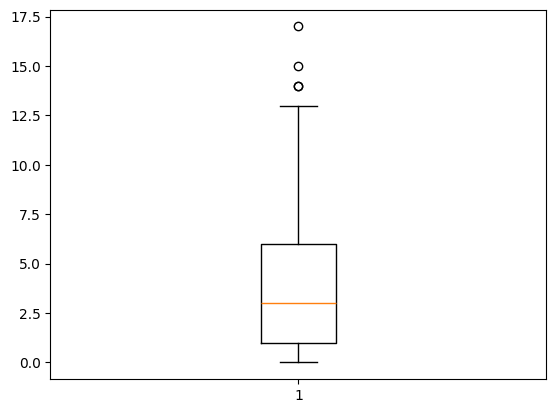

In [6]:
## Cual es la media de embarazos?
print(df_diabetes['Pregnancies'].min())
print(df_diabetes['Pregnancies'].mean())
print(df_diabetes['Pregnancies'].max())
plt.boxplot(df_diabetes['Pregnancies'])
plt.show()

0
120.89453125
199


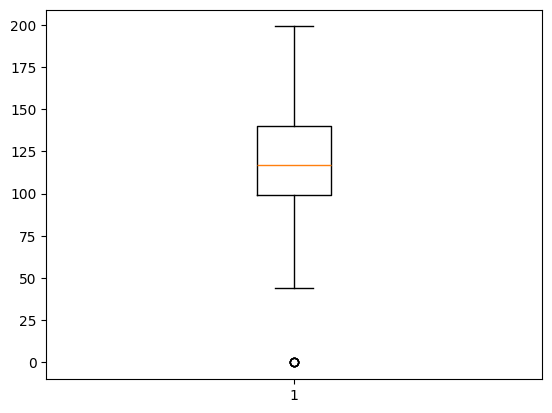

In [7]:
## Analisis por "Glucosa"
print(df_diabetes['Glucose'].min())
print(df_diabetes['Glucose'].mean())
print(df_diabetes['Glucose'].max())
plt.boxplot(df_diabetes['Glucose'])
plt.show()

0
69.10546875
122


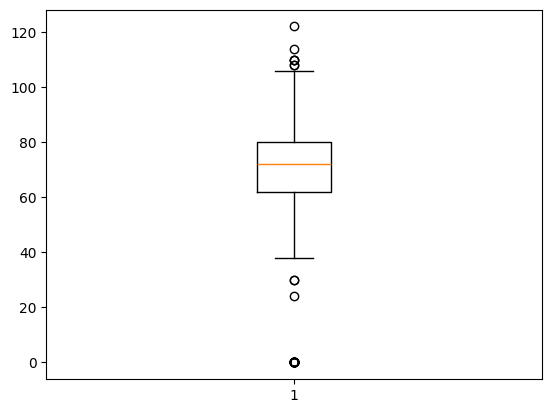

In [8]:
## Analisis por "Presion Arterial"
print(df_diabetes['BloodPressure'].min())
print(df_diabetes['BloodPressure'].mean())
print(df_diabetes['BloodPressure'].max())
plt.boxplot(df_diabetes['BloodPressure'])
plt.show()

0
20.536458333333332
99


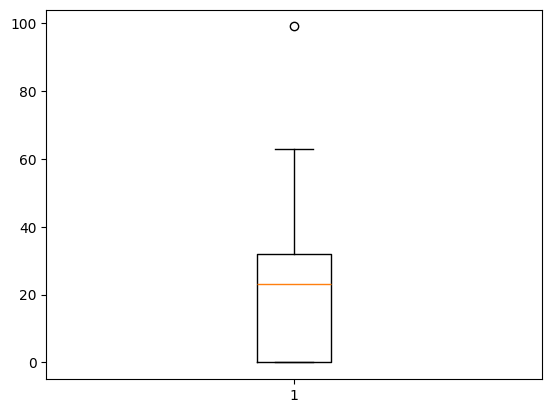

In [9]:
## Analisis por "Grosor de la Piel"
print(df_diabetes['SkinThickness'].min())
print(df_diabetes['SkinThickness'].mean())
print(df_diabetes['SkinThickness'].max())
plt.boxplot(df_diabetes['SkinThickness'])
plt.show()

0
79.79947916666667
846


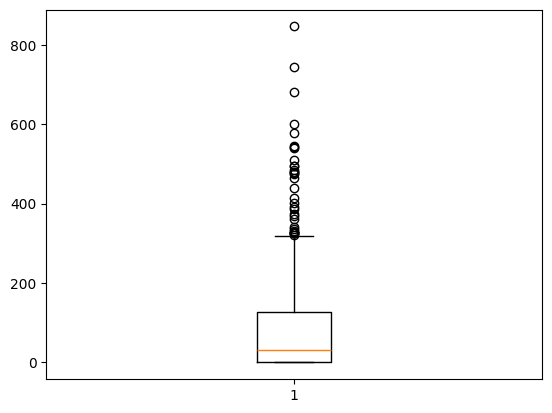

In [10]:
## Analisis por "Insulina"
print(df_diabetes['Insulin'].min())
print(df_diabetes['Insulin'].mean())
print(df_diabetes['Insulin'].max())
plt.boxplot(df_diabetes['Insulin'])
plt.show()

0.0
31.992578124999998
67.1


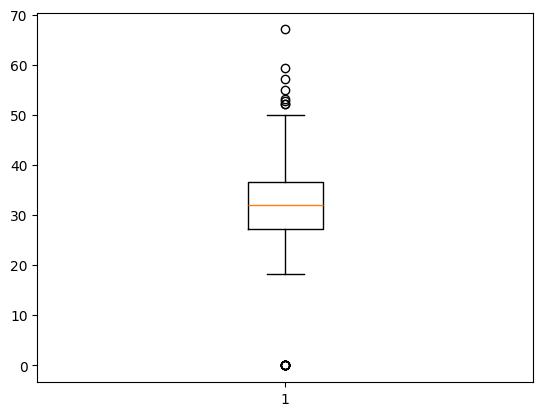

In [11]:
## Analisis por "Indice de masa corporal"
print(df_diabetes['BMI'].min())
print(df_diabetes['BMI'].mean())
print(df_diabetes['BMI'].max())
plt.boxplot(df_diabetes['BMI'])
plt.show()

21
33.240885416666664
81


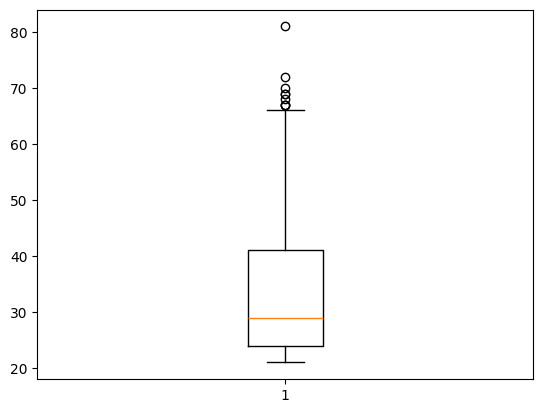

In [12]:
## Analisis por "edad"
print(df_diabetes['Age'].min())
print(df_diabetes['Age'].mean())
print(df_diabetes['Age'].max())
plt.boxplot(df_diabetes['Age'])
plt.show()

In [13]:
df_diabetes['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

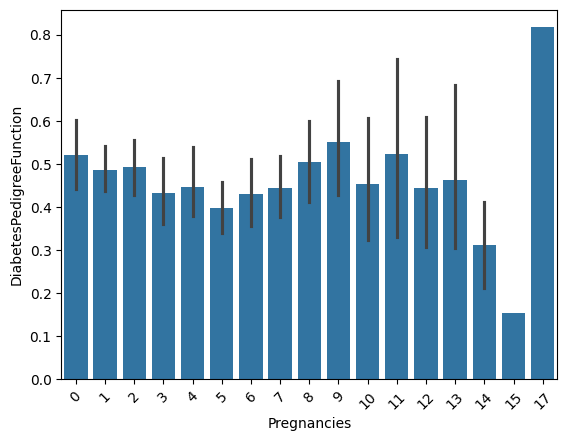

In [14]:
## Analizar la proporcion del Función hereditaria de diabetes, segmentado la cantidad de hijos
sns.barplot(x="Pregnancies", y="DiabetesPedigreeFunction", data=df_diabetes, estimator="mean")
plt.xticks(rotation=45)
plt.show()

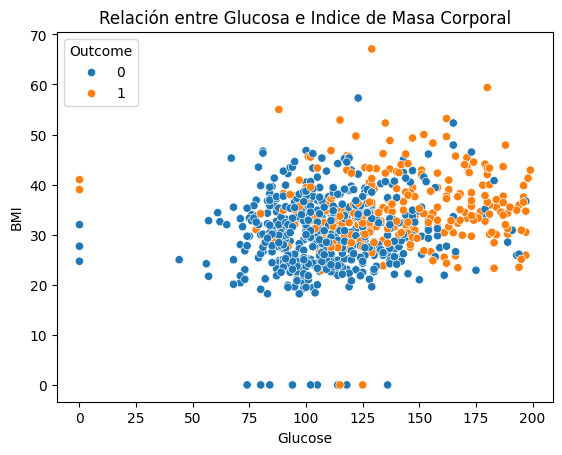

In [15]:
# Crea el gráfico de dispersión
sns.scatterplot(x="Glucose", y="BMI", data=df_diabetes, hue='Outcome')
plt.title('Relación entre Glucosa e Indice de Masa Corporal')
plt.show()

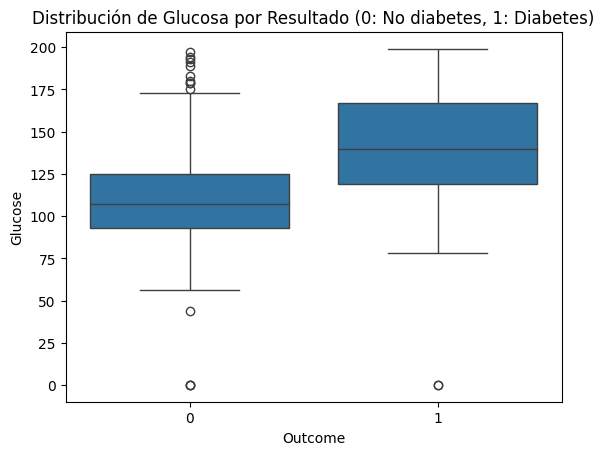

In [16]:
# Crea el gráfico de caja
# Usamos 'Outcome' en el eje X para comparar los dos grupos (con y sin diabetes)
# y 'Glucose' en el eje Y para ver la distribución de los niveles de glucosa
sns.boxplot(x='Outcome', y='Glucose', data=df_diabetes)
plt.title('Distribución de Glucosa por Resultado (0: No diabetes, 1: Diabetes)')
plt.show()

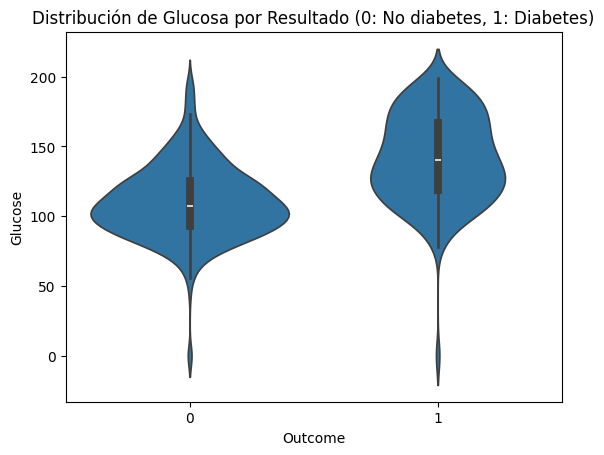

In [17]:
# Crea el gráfico de violin
# Usamos 'Outcome' en el eje X para comparar los dos grupos (con y sin diabetes)
# y 'Glucose' en el eje Y para ver la distribución de los niveles de glucosa
sns.violinplot(x='Outcome', y='Glucose', data=df_diabetes)
plt.title('Distribución de Glucosa por Resultado (0: No diabetes, 1: Diabetes)')
plt.show()

Preprocesamiento de datos:

Reglas de negocio, Eliminación de duplicados, Tratamiento de valores nulos, Normalización de datos, Conversión de columnas categoricas a numéricas, etc

In [18]:
df_diabetes.select_dtypes(include=["float64"]).columns

Index(['BMI', 'DiabetesPedigreeFunction'], dtype='object')

In [19]:
df_diabetes.select_dtypes(include=["int64"]).columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'Age', 'Outcome'],
      dtype='object')

In [20]:
## Revisar si tiene duplicados
df_diabetes.duplicated().sum() ##-- No tengo duplicados


np.int64(0)

In [21]:
## Revisar si tengo valores nulos
df_diabetes.isnull().sum() ##-- No tengo valores nulos


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [54]:
# Reemplazar 0s con NaN en las columnas relevantes, usando .loc
columnas_con_ceros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_diabetes.loc[:, columnas_con_ceros] = df_diabetes.loc[:, columnas_con_ceros].replace(0, np.nan)

# Imputar (rellenar) los valores nan con la mediana de cada columna
# Asignando el resultado directamente a la columna, sin 'inplace=True'
for col in columnas_con_ceros:
    mediana = df_diabetes[col].median()
    df_diabetes.loc[:, col] = df_diabetes[col].fillna(mediana)

print("Preprocesamiento completado sin advertencias.")

Preprocesamiento completado sin advertencias.


In [ ]:
# Filtramos el dataframe para mantener solo las filas donde 'Glucose' es menor o igual a 180 y mayor a 60
df_diabetes = df_diabetes[df_diabetes['Glucose'] <= 180]
df_diabetes = df_diabetes[df_diabetes['Glucose'] > 60]
df_diabetes.shape

(723, 9)

In [56]:
# Obtenemos la forma del dataframe después del filtro
print(f"Dimensiones del dataframe después del filtro: {df_diabetes.shape}")

Dimensiones del dataframe después del filtro: (723, 9)


In [57]:
# Separar los datos en X (variables predictoras) y y (variable objetivo)
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

In [58]:
## Escalar los datos de las diferentes columnas (normalización)
scaler = StandardScaler()
scaler.fit(X)
X_escalado = scaler.transform(X)

In [59]:
# Convertir la matriz de datos escalados a un DataFrame de Pandas
df_diabetes_escalado = pd.DataFrame(X_escalado, columns=X.columns)

Balancear datos (En caso de ser necesario)

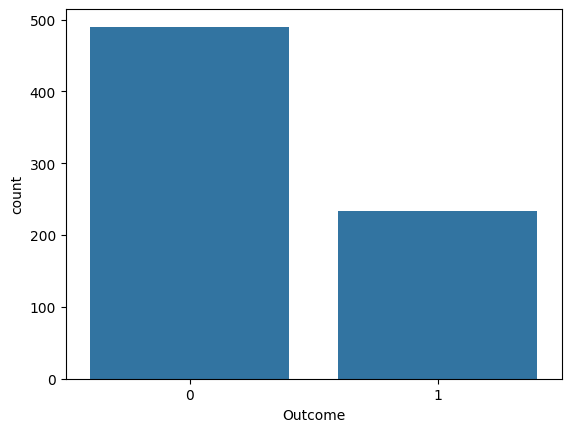

In [60]:
sns.countplot(x='Outcome', data=df_diabetes)
plt.show()

In [61]:
df_diabetes['Outcome'].value_counts()

Outcome
0    490
1    233
Name: count, dtype: int64

In [62]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Balanceo de datos con SMOTE
#smote = SMOTE(random_state=42)
#X_smote, y_smote = smote.fit_resample(X, y)

# Verificar el balanceo
#print("Conteo de clases después de SMOTE:")
#print(y_smote.value_counts())

In [63]:
# Balanceo de datos con RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Verificar el balanceo
print("Conteo de clases después de RandomOverSampler:")
print(y_ros.value_counts())

Conteo de clases después de RandomOverSampler:
Outcome
1    490
0    490
Name: count, dtype: int64


In [64]:
# Ahora, aplicamos RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [65]:
# Verificamos si los datos están balanceados
print("Conteo de clases antes del submuestreo:")
print(y.value_counts())

Conteo de clases antes del submuestreo:
Outcome
0    490
1    233
Name: count, dtype: int64


In [66]:
print("\nConteo de clases después del submuestreo:")
print(y_resampled.value_counts())


Conteo de clases después del submuestreo:
Outcome
0    233
1    233
Name: count, dtype: int64


In [67]:
X_resampled.shape
y_resampled.shape

(466,)

Modelamiento

1. Separar los datos en entrenamiento y prueba (SPLIT)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=42, stratify=y_resampled)

2. Seleccionar el modelo o los modelos a usar

In [69]:
# Crear los modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier #Modelo basado en arboles que usa bagging
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier #Modelo basado en arboles que usa bagging
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

model_DT  = DecisionTreeClassifier()
model_Bagging   =BaggingClassifier()
model_RF  = RandomForestClassifier()
model_AB  = AdaBoostClassifier()
model_SVC = SVC()
model_ET  = ExtraTreesClassifier()
model_XGB = XGBClassifier()
model_Logistic = LogisticRegression(max_iter=1000)
model_GB  = GradientBoostingClassifier()

3. Entrenar los modelos (FIT)

In [70]:
model_DT.fit(X_train,y_train)
model_Bagging.fit(X_train,y_train)
model_RF.fit(X_train,y_train)
model_AB.fit(X_train,y_train)

model_ET.fit(X_train,y_train)
model_XGB.fit(X_train,y_train)
model_Logistic.fit(X_train, y_train) 
model_GB.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [71]:
model_SVC.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


4. Realizar la prediccion con los modelos entrenados previamente (PREDICT)

In [72]:
#Predecir y obtener el accuracy
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
y_pred_DT=model_DT.predict(X_test)
y_pred_Bagging=model_Bagging.predict(X_test)
y_pred_RF=model_RF.predict(X_test)
y_pred_AB=model_AB.predict(X_test)
y_pred_SVC=model_SVC.predict(X_test)
y_pred_ET=model_ET.predict(X_test)
y_pred_XGB=model_XGB.predict(X_test)
y_pred_Logistic = model_Logistic.predict(X_test)
y_pred_GB=model_GB.predict(X_test)
models = ['DT', 'Bagging', 'RF', 'AB', 'ET', 'XGB', 'Logistic', 'GB']
predictions = [y_pred_DT, y_pred_Bagging, y_pred_RF, y_pred_AB, y_pred_ET, y_pred_XGB, y_pred_Logistic, y_pred_GB]

5.Evaluación de modelos y análisis de resultados (sklearn.metrics)

In [73]:
X.shape

(723, 8)

In [74]:
X_train.shape

(396, 8)

In [75]:
X_test.shape

(70, 8)

Matriz de confusión:


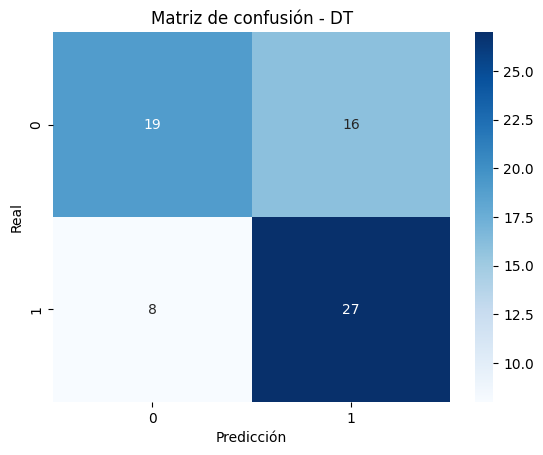



Resultados para el modelo DT:
  Accuracy: 0.6571428571428571
  Recall: 0.7714285714285715
  F1-score: 0.6923076923076923
  Precision: 0.627906976744186
--------------------
Matriz de confusión:


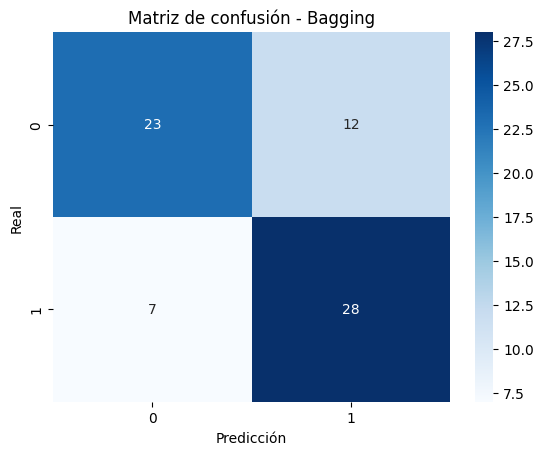



Resultados para el modelo Bagging:
  Accuracy: 0.7285714285714285
  Recall: 0.8
  F1-score: 0.7466666666666667
  Precision: 0.7
--------------------
Matriz de confusión:


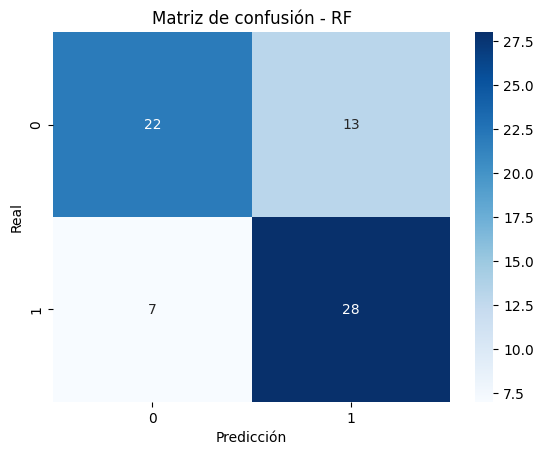



Resultados para el modelo RF:
  Accuracy: 0.7142857142857143
  Recall: 0.8
  F1-score: 0.7368421052631579
  Precision: 0.6829268292682927
--------------------
Matriz de confusión:


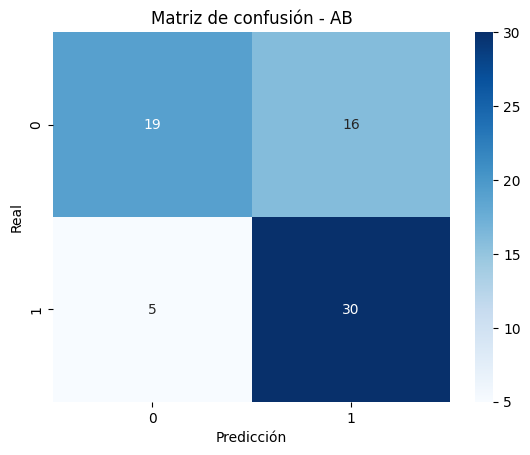



Resultados para el modelo AB:
  Accuracy: 0.7
  Recall: 0.8571428571428571
  F1-score: 0.7407407407407407
  Precision: 0.6521739130434783
--------------------
Matriz de confusión:


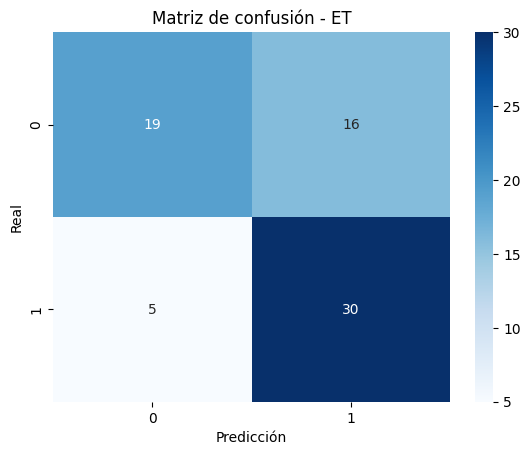



Resultados para el modelo ET:
  Accuracy: 0.7
  Recall: 0.8571428571428571
  F1-score: 0.7407407407407407
  Precision: 0.6521739130434783
--------------------
Matriz de confusión:


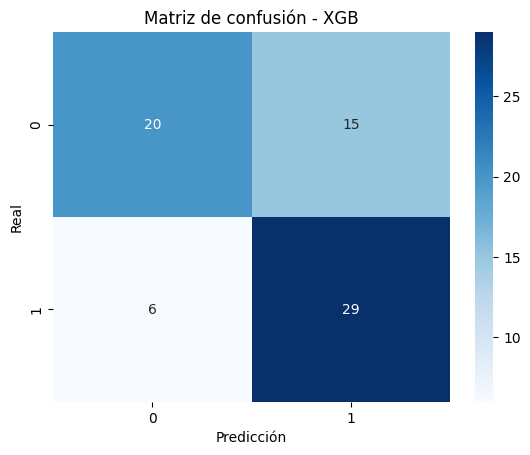



Resultados para el modelo XGB:
  Accuracy: 0.7
  Recall: 0.8285714285714286
  F1-score: 0.7341772151898734
  Precision: 0.6590909090909091
--------------------
Matriz de confusión:


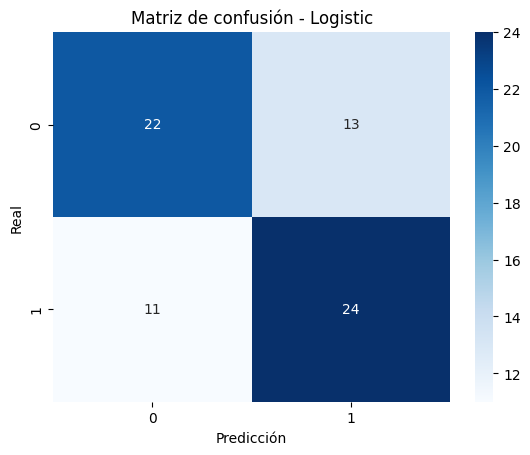



Resultados para el modelo Logistic:
  Accuracy: 0.6571428571428571
  Recall: 0.6857142857142857
  F1-score: 0.6666666666666666
  Precision: 0.6486486486486487
--------------------
Matriz de confusión:


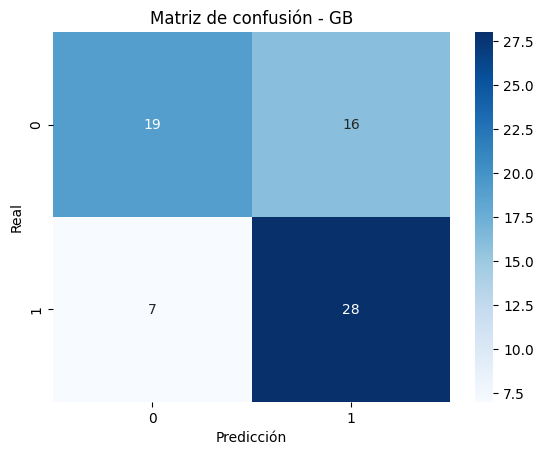



Resultados para el modelo GB:
  Accuracy: 0.6714285714285714
  Recall: 0.8
  F1-score: 0.7088607594936709
  Precision: 0.6363636363636364
--------------------


In [76]:
for model_name, prediction in zip(models, predictions):
    cm = confusion_matrix(y_test, prediction)
    print("Matriz de confusión:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de confusión - {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()
    print("\n")
    accuracy = accuracy_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    precision = precision_score(y_test, prediction)

    print(f"Resultados para el modelo {model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}")
    print(f"  Precision: {precision}")
    print("-" * 20)

In [77]:
# Probar con un dato sintetico
np.random.rand(1,8)

array([[0.11050409, 0.90628122, 0.75902506, 0.39544469, 0.52203361,
        0.57928   , 0.36271257, 0.80650258]])

In [78]:
model_XGB.predict_proba(np.random.rand(1,8))

array([[0.9977402 , 0.00225977]], dtype=float32)